# **Loan Default Prediction - Final Submission**

*Note: I copied my entire Milestone Submission and submitted below the Exec Summary, etc.. Made some minor additions + improvements to the original code and addded the Final Solution components up front.*

## Executive Summary 
*What are the most important findings from the analysis done in Milestone? Describe the final proposed model specifications?*

**Key Takeaways**
- The best model to predict which customers are likely to default on their loans is the *Tuned Random Forest Classifier* model.
  - Overall, this model had high Precision (88%), Recall (87%), and Accuracy (92%) scores. But most critically, its Recall for class 1 (indicating a loan will default) was comparatively high (78% on the test data). High Recall is important given banks are risk-averse and want to reduce the number of "bad loans" they provide.
- A customer's debt-to-income ratio (DEBTINC) is the attribute most predictive of a loan default. Number of delinquent credit lines (DELINQ) is the second most significant predictor, followed by the age of the oldest credit line in months (CLAGE). The rest of the attributes have little or no influence on loan default.
- The business can operate with high confidence using this model (92% of its predictions for defaults and non-defaults were correct.) but should be aware that the model performs slightly better at predicting non-defaults than defaults.


**Final Proposed Model Specifications**

*Note: More info below in "Problem and solution summary" section on solution design and recommendation background.*

- Model type: Tuned Random Forest Classifier
- Why? The Tuned Random Forest Classifier model outperformed the Decision Tree model in terms of both Recall, Precision, and Accuracy on the test data. Given that the bank is risk-averse and wants to minimize the chance of approving loans that will default, the higher Recall score for class 1 (indicating a loan will default) by the Random Forest Classifier makes it the obvious choice. In general, I tried the Random Forest Classifier b/c this is a classification problem (default or no-default); Regression models would not make sense here.
- Metrics:
  - Training Data:
    - Recall for class 1: 1.00 (indicating the model identifies nearly all instances that would default)
    - Precision for class 1: 0.90
    - Overall Accuracy: 0.98
  - Test Data:
    - Recall for class 1: 0.78 (still relatively high, suggesting the model catches a majority of potential defaulters)
    - Precision for class 1: 0.81
    - Overall Accuracy: 0.92

In [71]:
print("Choosing the final model: Test performance comparison:")
models_test_comp_df

Choosing the final model: Test performance comparison:


,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier
Precision,0.778166,0.799617,0.898109,0.879101
Recall,0.750669,0.804204,0.818166,0.868958
Accuracy,0.853703,0.870560,0.912101,0.919326


## Problem and solution summary
*Provide the summary of the problem. State the reasons for the proposed solution design. How it would affect the problem/business*

#### Problem Summary

Most of the profits of your average retail bank come from interest payments on home loans. But if a bank isn't careful "bad loans" (aka the customer defaults on a loan) can significantly reduce their profits. For this reason, banks put all new loan applications through an extensive approval process where the creditworthiness of the loan application is determined. Predictive models can be used to help banks make these decisions more efficiently (less human review time) and with less bias (not rejecting loan candidates unfairly based on demographic stereotypes).

The goal of this initiative is to build an accurate model which helps banks predict which potential customers are likely to default on their loans and what attributes a bank should be on the lookout for. Using this data the bank will decline to approve these "risky" loans and improve their profits.

#### Solution Design Background

In building the prediction model I acknowledge that there is a tradeoff to be made between "optimizing" to reduce the two types of false predictions (false positive error and false negative error).

1. Predicting a loan will default when they would not (false positive error)
2. Predicting a loan will not default when they actually would default (false negative error)

Which error type is the most important to guard against really depends one the bank's goals. If a bank is willing to prioritize growth and is comfortable with a bit more risk they'll care more about the "false positive error" which would eat into their profits b/c it would turn away perfectly good customers. But if the bank is more risk-averse, they'll care more about the "false negative error" which means giving loans to individuals who could default and cause financial loss.

**I'm making an assumption that most large banks are risk-averse (and might be legally required to make decisions accordingly) so we're going to assume they will make decisions to minimize their risk as much as possible. Given this, predicting a loan will not default when they actually would default (false negative error) would actually be the most important case to guard against.**

**Because of this we're going to attempt to maximize the Recall to catch as many potential defaults as possible. Precision is important but somewhat less so.**

After splitting the test and training data, I ran a decision tree (since this is a classification problem). This initial decision tree model performance suggested the model was overfitting to the training data. To remedy this I performed the "grid search" method of "hyper-parameter tuning". Grid Search works by trying every combination of hyperparameters provided in the grid. It evaluates each combination based on the specified scoring metric and cross-validation strategy. After trying all combinations, it returns the model with the best performance. 

Using grid search in this way seems to have reduced overfitting significantly. Before tuning, the overall accuracy difference was 15 percentage points (100% - 85%), and now it's only 3 percentage points (90% - 87%). Testing performance has also improved slightly as well (from 85% to 87%). Overall performance is down a bit from 100% to 90% which isn't terrible. This could just be suggesting that the original model was simply "memorizing" the data and not able to generalize from it. Recall is high at 0.80.

In this model, when exploring feature importance it is clear that debt-to-income ratio (DEBTINC). Number of delinquent credit lines (DELINQ) is the second most significant predictor in terms of likelihood of default, followed by the age of the oldest credit line in months (CLAGE). All these attributes being predictive of loan default make lot's of sense.

I then tried to build a Random Forest Classifier model to see whether this performed any better. Again, the initial random forest classifier model performance suggested the model was overfitting to the training data. Also, recall on 1 (aka default) was low (0.66) which is very important given we want to minimize the number of "false negatives" meaning the number of loans we assume will be paid which will actually end up defaulting. Again, I used "grid search" to tune the model and the results were greatly improved post-tuning: The tuned model seems to be overfitting slightly less with still good accuracy. Also, we bumped up our Recall for 1 (aka default) on the test data from 0.66 to 0.78 which is great since this is what we're trying to optmize for!

#### Solution Design Recommendation

Both the Tuned Decision Tree and Random Forest Classifier models seem to work well but **my recommendation is to use the tuned Random Forest Classifier model**. *Why?* 

The Random Forest Classifier has a higher Recall for both training and test datasets compared to the Decision Tree. And since we're assuming that bank aims to minimize false negatives, choosing the option with higher recall. Yes, with the Random Forest Classifier there is a bigger difference between (0.22, 1.00 - 0.78) than with the decision tree, which indicates some overfitting but given we're optimizing to reduce false negatives (aka maximize recall, aka reduce given loans to those likely to default), Random Forest still seems to be the best option.

Decision Tree:
- Training Recall for class 1 (default): 0.77
- Test Recall for class 1 (default): 0.69

Random Forest Classifier:
- Training Recall for class 1 (default): 1.00
- Test Recall for class 1 (default): 0.78

#### How would this affect the business?

Using this model will help the bank more accurately identify which prospective customers are likely to default on their loans so they can decline those loan applications. The model is optmized to reduce the false negative error (predicting a loan will not default when they actually would default) and, in turn, reduce the bank's risk without negatively impacting their profits too much (from turning away perfectly good customers).

The result it that the bank should end up declining loans for customers who fit a profile of debt-to-income ratio (DEBTINC), high # of delinquent credit lines (DELINQ), and oldest credit line (CLAGE).


# Recommendations for implementation
*What are some key recommendations to implement the solution? What are the key actions for stakeholders? What is the expected benefit and/or costs (List the benefits of the solution. State some rational assumptions to put forward some numbers on costs/benefits for stakeholders)? What are the potential risks or challenges of the proposed solution design? What further analysis needs to be done or what other associated problems need to be solved?*

**Key implementation recommendations** to implement the solution? What are the key actions for stakeholders? 
- The bank should leverage the Tuned Random Forest Classifier model when a new customer requests a loan to determine whether or not they should extend a loan to this customer. One approach would be to create additional process efficiencies and reduction in biases by building a software experience. Collect all the customers attributes in a web-based application process (e.g. DELINQ, LOAN), pre-process the data, run the attributes through the model and make a recommendation. Have a final human review the recommendation and data before supplying the final decision to the customer.
- We saw that a high **debt-to-income ratio (DEBTINC) is the most important driver of default.** The bank should consider this metric ahead of all others. Potentially including a maximium debt-to-income ratio (DEBTINC) amount as part of the application process to dsicourage folks from applying who will clearly not meet the criteria.

**What is the expected benefit and/or costs of the solution**

Benefits:
- This model will help the bank more accurately predict which potential customers are likely to default on their loans. They will then decline to back those loan applications and they will reduce their losses from loan defaults. 
- The model is optmized to reduce the false negative error which will reduce the bank's risk of providing a loan which is likely to default

Costs:
- The model is not perfect (the model is incorrect 8% of the time) and it will produce some "false positive errors" (19% of the time) where the bank will turn away a perfectly good customers who is unlilkely to default; resulting of in reduced profits. It will also produce some "false negatives" (22% of the time) where it will predict a non-default which will default; also reducing profits.

**What are the potential risks or challenges of the proposed solution design?**
- The model could benefit from additional data and updated data as new loan data becomes available
- Further hyperparameter tuning could also refine the model. For example, the model performs well in identifying both classes, but it's slightly better at predicting non-defaults (class 0) than defaults (class 1). We could try to optimize this further.

# BELOW IS FROM MILESTONE SUBMISSION. SOME UPDATES MADE

## **Problem Definition**

### **The Context:**

 - Most of the profits of your average retail bank comes from interest payments on home loans. But if a bank isn't careful "bad loans" (aka the customer defaults on a loan) can significantly reduce their profits. For this reason banks put all new loan applications through an extensive approval process where the creditworthiness of the loan application is determined. Predictive models can be used to help banks make these decisions more efficiently (less human review time) and with less bias (not rejecting loan candidates unfairly based on demographic stereotypes). 

### **The objective:**

 - The goal of this initiative is to build an accurate model which helps banks predict which potential customers are likely to default on their loans and what attributes a bank should be on the lookout for. Using this data the bank will decline to approve these "risky" loans and improve their profits.

### **The key questions:**

- What potential customers are likely to default on their loans?
- What attributes (or confluence of attributes) are most predictive of a loan default?
- How much more likely do those attributes make a loan default?
- What is the confidence level we have in the model that certain attributes are actually predictive of a default? (We don't want to be denying folks who actually had a high likelihood of paying back their loans).
- Are there any biases present in the default determinations? If so, how bad are they?
- How much money might a bank lose or gain if it modified their approval criteria? For example, if the bank lwoers their bar and approves additional "risky" loans they'll make more money from those additive interest payments but if too many of those "risky" loans the bank's financial gains will be offset.

### **The problem formulation**:

- Predict what customers are likely to default on their loans
- Determine what attributes contribute to a loan default


## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [4]:
#import libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
#import dataset

df = pd.read_csv('hmeq.csv')

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [6]:
# check out the first 5 records

df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [7]:
# check out info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [8]:
# count the number of unique values

df.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

**Observations**
- There are 5960 observations and 13 columns in the dataset
- Data types are a mix of integers, floats and objects
- Many of the columns (e.g. MORTDUE) contain null values

**Observation**
- From the # uniques we can determine that there are a mix of categorical (e.g. REASON) and contiguous values (e.g. VALUE) in the data
- We don't have a unique identifier present to drop

In [9]:
# Check for duplicate rows

df.duplicated().sum()

0

**Observation**
- Okay, no duplicates. That is great!

**Missing values**

In [10]:
# Check for missing values

df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

**Observation**
- Okay, that feels like a large number of missing values. But what % of the total are missing values and what should I do about that?

In [11]:
# Find # of missing values per column
missing_values = df.isnull().sum()

# Find # of total values per column
total_values = df.count() + missing_values

# Find % of missing values per column
missing_percentage = (missing_values / total_values) * 100

print('Percentage of Missing Values Per Column:\n', missing_percentage)

Percentage of Missing Values Per Column:
 BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64


**Observations**
- Okay some of these are high % of missing values especially for DEBTINC, DEROG, etc.
- We'll to handle the missing by using a central tendency measure (specifically "mean"). There are some downsides here (for example, it can reduce the variability of the data and it can't account for the uncertainty about the missing values) but it seems like a good option

In [12]:
# check summary statistics (transformed)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


In [13]:
# fill in all the missing values with the mean values

df_filled = df.fillna(df.mean())  

In [14]:
# Confirm missing values were removed

df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

**Observation**
- The "fill missing values" code doesn't seem to have worked. Why might this be? I think it is because some of our columns are non-numeric. The mean function won't work on non-numeric data. 
- Let's do this:
  - a) Create numerical columns. Fill missing values using the mean for these numeric values
  - b) Create categorical variables. For the categorical variables, we're just going to drop the rows with missing data as they were < 5% of the total values

In [15]:
# Create a copy of the dataframe
df_filled = df.copy()  

# create numerical columns
num_cols = ['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# create categorical variables
cat_cols = ['REASON', 'JOB']

In [16]:
# Trying again to fill in all the missing values for numerical cols with the mean values

for col in num_cols:
    df_filled = df.fillna(df.mean())

In [17]:
# Check to see if this is working and confirm missing numerical values have been filled in

df_filled.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON     252
JOB        279
YOJ          0
DEROG        0
DELINQ       0
CLAGE        0
NINQ         0
CLNO         0
DEBTINC      0
dtype: int64

In [18]:
# Drop rows with NA values in categorical columns

df_filled.dropna(subset=cat_cols, inplace=True)

In [19]:
# Confirm one last time that all missing values have been filled in

df_filled.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

**Observations**
- Boom! No more missing values

# **Exploratory Data Analysis and Visualization**

**Leading Questions**:

1. What is the range of values for the loan amount variable "LOAN"?
- 1,100 to 89,900
2. How does the distribution of years at present job "YOJ" vary across the dataset?
- 0 to 41 years. Average = 8.9 years but skews heavily towards applicants who have not been in their jobs very long. With this highest % of applicants being in their role for only a few years.
3. How many unique categories are there in the REASON variable?
- 2. DebtCon and HomeImp
4. What is the most common category in the JOB variable?
- Other
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
- No, REASON does not appear to have much of an impact on default
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
- No it does not appear that applicants who defaulted have a significantly different loan amount compared to those who repay their loan
7. Is there a correlation between the value of the property and the loan default rate?
- No, it does not appear that there is.
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?
- In this exploratory analysis, no, applicants who default don't seem to have a significantly different mortgage amount compared to those who repay their loan


*Note: See details below for how the ^ answers were arrived at*

In [20]:
# check to see how the summary statistics have changed given the filling and deleting

df_filled.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5536.0,0.203757,0.402827,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5536.0,18745.086705,11013.800215,1100.000000,11200.000000,16500.000000,23600.000000,89900.000000
MORTDUE,5536.0,74153.164133,43174.276888,2063.000000,48107.500000,69193.500000,89000.000000,399550.000000
VALUE,5536.0,102526.729187,57877.330745,8000.000000,66690.250000,90550.500000,119361.000000,855909.000000
YOJ,5536.0,8.892219,7.224251,0.000000,3.000000,8.000000,12.000000,41.000000
DEROG,5536.0,0.249149,0.784944,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5536.0,0.447328,1.078869,0.000000,0.000000,0.000000,0.449442,15.000000
CLAGE,5536.0,179.743164,85.010226,0.000000,116.530533,175.590529,229.316538,1168.233561
NINQ,5536.0,1.200989,1.682128,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5536.0,21.492350,10.040684,0.000000,15.000000,21.000000,26.000000,71.000000


**Observation**
- 19.95% of all loans were defaulted on (which seems quite high)
- Mean loan = 18,745
- Mean property value = 102,526
- Mean years at job = 8.9 years

**Univariate Analysis**

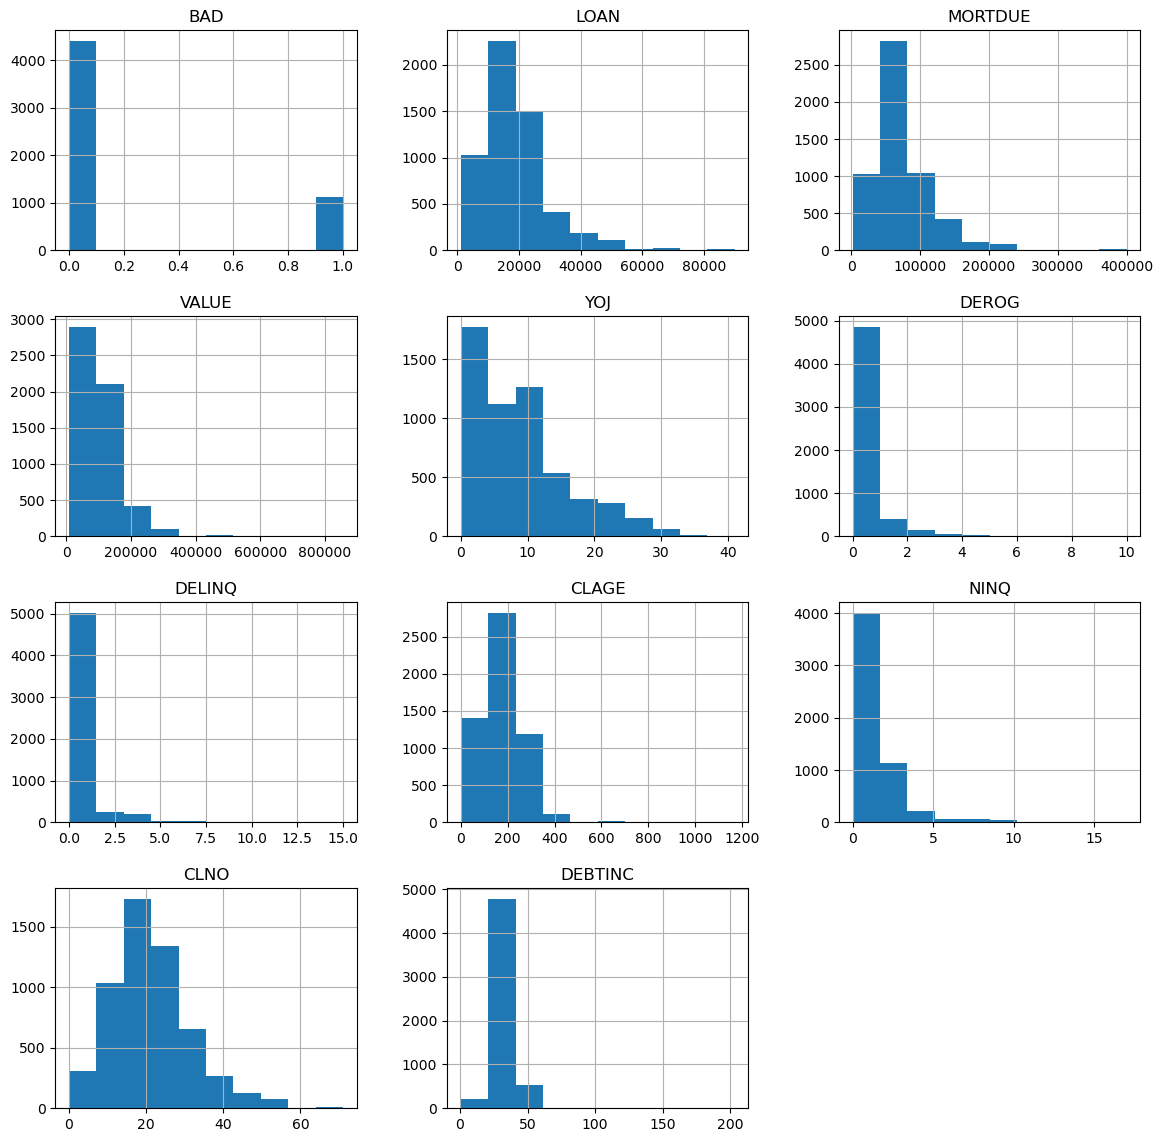

In [21]:
# Creating histograms
df_filled[num_cols].hist(figsize = (14, 14))

plt.show()

**Observation**
- Years on job skews average = 8.9 years but skews heavily towards applicants who have not been in their jobs very long. With this highest % of applicants being in their role for only a few years
- There is greater distributiuion in terms of number of existing credit lines than for some of the other variables

In [22]:
# Let's run univariate analysis for the categorical variables. specifically, printing the % sub categories of each category

# Printing the % sub categories of each category.
for i in cat_cols:

    print(df_filled[i].value_counts(normalize = True))

    print('*' * 40)

DebtCon    0.688764
HomeImp    0.311236
Name: REASON, dtype: float64
****************************************
Other      0.419075
ProfExe    0.226156
Office     0.166366
Mgr        0.134754
Self       0.033960
Sales      0.019689
Name: JOB, dtype: float64
****************************************


**Observations**
- DebtCon (debt consolidation) is the most common reason for the loan applications
- There aren't many job options listed here. Maybe for this reason the largest category is "Other" with "ProfExe" (assuming Professional/Executive" being the 2nd most common category

**Bivariate Analysis**

In [23]:
# Let's create some functions to continue our analysis. Function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [24]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

BAD         0     1   All
REASON                   
All      4408  1128  5536
DebtCon  3077   736  3813
HomeImp  1331   392  1723
------------------------------------------------------------------------------------------------------------------------


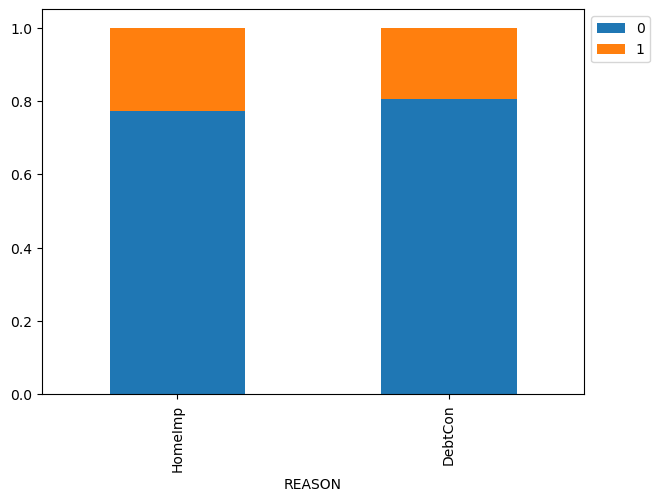

In [25]:
# let's see how REASON (home improvement or debt consolidation) linked to likelihood to default (BAD)

stacked_barplot(df_filled, "REASON", "BAD")

**Observation**
- No, REASON does not appear to have much of an impact on default

BAD         0     1   All
JOB                      
All      4408  1128  5536
Other    1782   538  2320
ProfExe  1050   202  1252
Mgr       574   172   746
Office    796   125   921
Self      135    53   188
Sales      71    38   109
------------------------------------------------------------------------------------------------------------------------


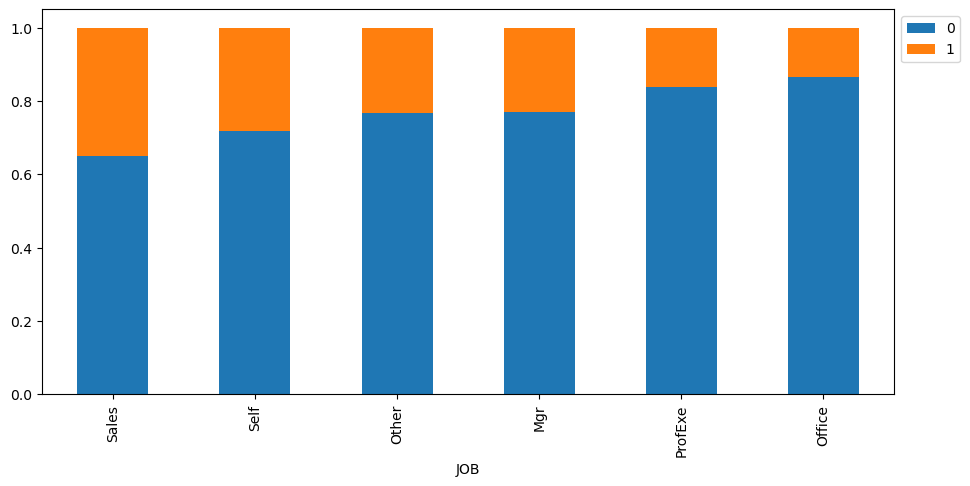

In [26]:
# let's see how JOB is linked to likelihood to default (BAD)

stacked_barplot(df_filled, "JOB", "BAD")

**Observation** 
- There does appear to be a difference here for JOB and rates of loan default
- One assumption that that the more "high risk / high reward" roles like "Sales" and "Self" have higher rates of default than presumably more stable jobs like "Office" or "ProfExe"

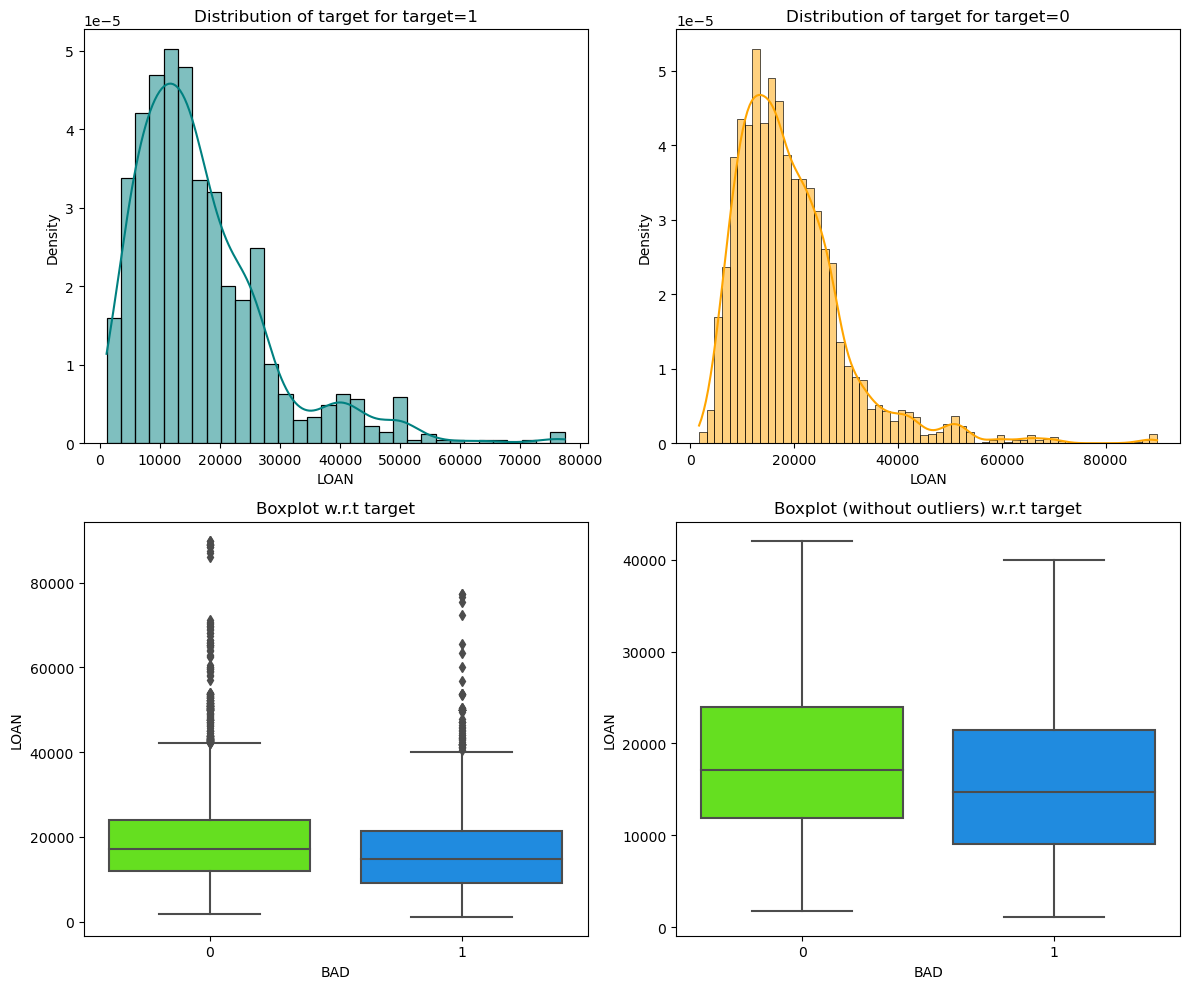

In [27]:
# let's see how loan amount (LOAN) is linked to likelihood to default (BAD)

distribution_plot_wrt_target(df_filled, "LOAN", "BAD")

**Observation**
- No it does not appear that applicants who defaulted have a significantly different loan amount compared to those who repay their loan


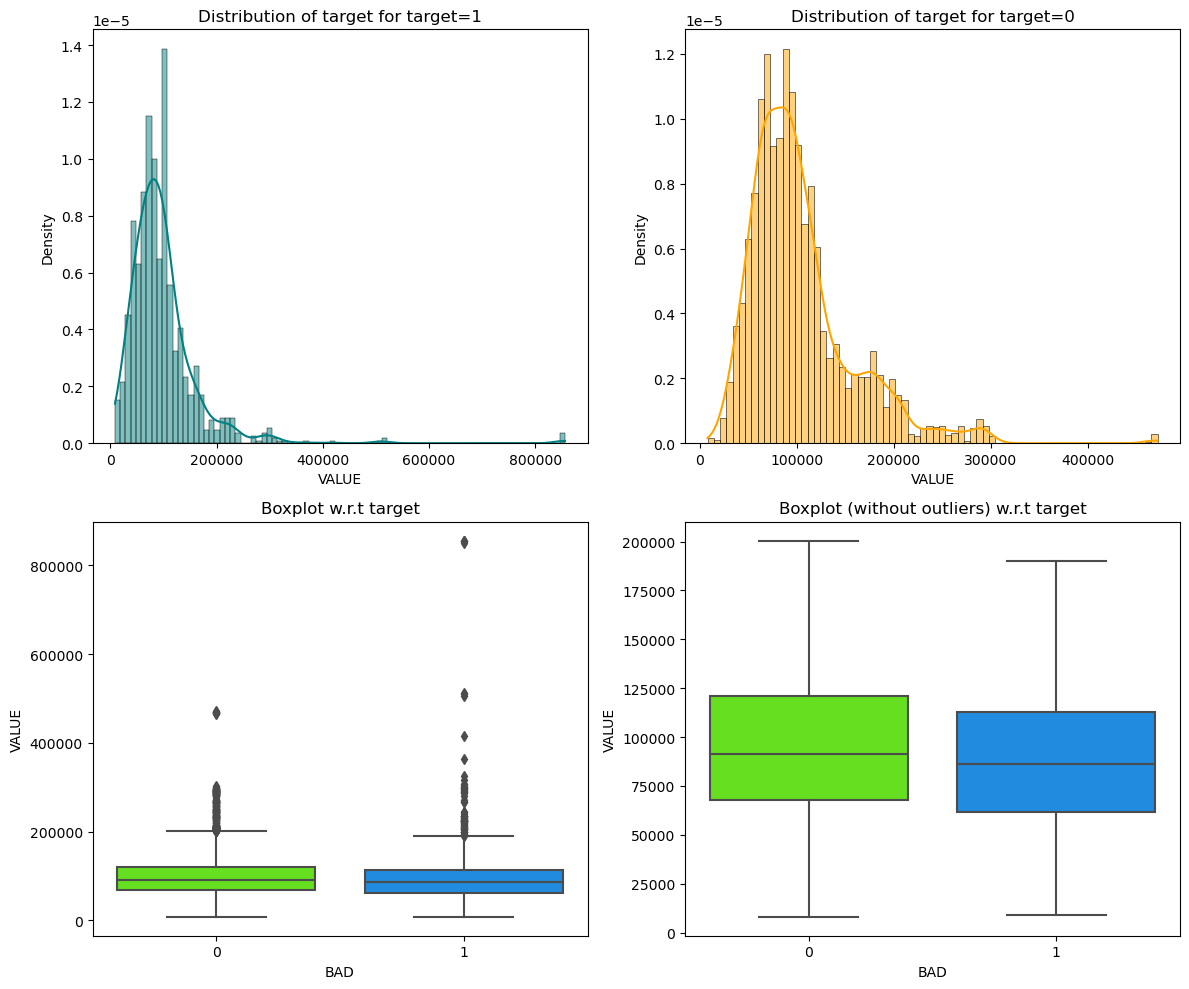

In [28]:
# let's see how the value of the property (VALUE) is linked to likelihood to default (BAD)

distribution_plot_wrt_target(df_filled, "VALUE", "BAD")

**Observation**
- No, it does not appear that there is a correlation between the value of the property and the loan default rate

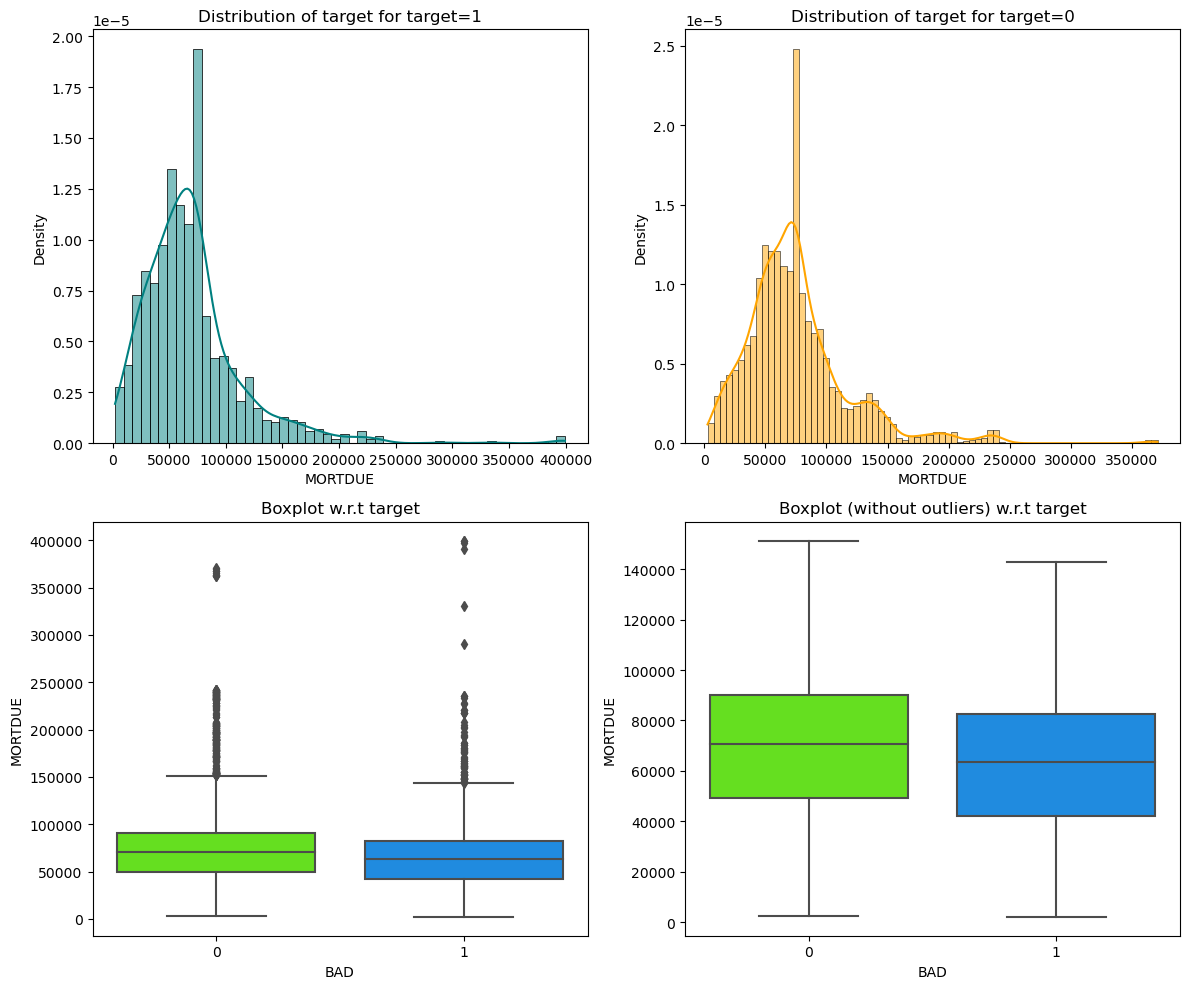

In [29]:
# let's see how the mortgage amount (MORTDUE) is linked to likelihood to default (BAD)

distribution_plot_wrt_target(df_filled, "MORTDUE", "BAD")

**Observation**
- No, applicants who default don't seem to have a significantly different mortgage amount compared to those who repay their loan

**Multivariate Analysis**

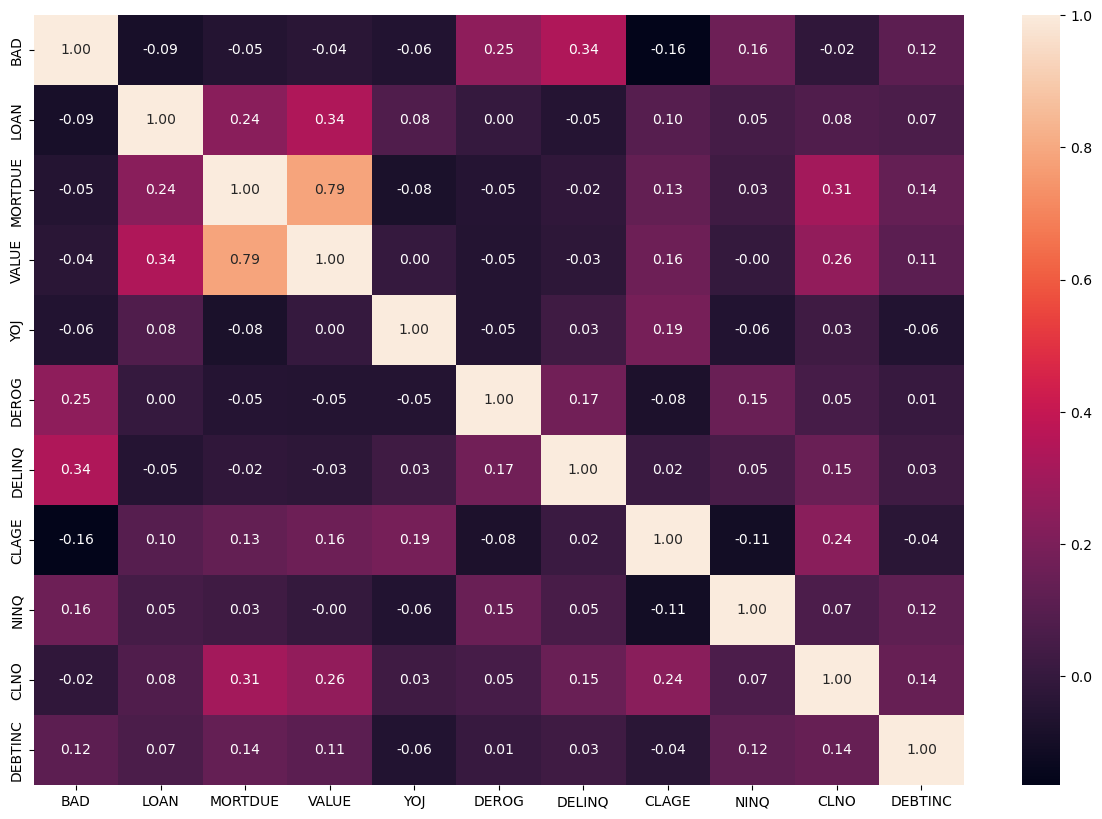

In [30]:
# let's check for correlation between the variables

plt.figure(figsize = (15, 10))

sns.heatmap(df_filled.corr(), annot = True, fmt = '0.2f')

plt.show()

**Observation**
- Correlations which aren't especially interesting: High correlation between VALUE and MORTDUE which makes sense and isn't really interesting to us; Also LOAN and VALUE which also is obvious and not especially interesting
- Correlations which are more interesting: DEROG and DELINQ and BAD (which, again is not too suprising)
- Overall, this isn't all too interesting in our analysis

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

*Note: This was included in the Observations scattered above.*

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

In [31]:
# Create dummy variables

df_filled = pd.get_dummies(df_filled, columns = cat_cols, drop_first = True)

In [32]:
# Separate the features and the target

X = df_filled.drop('BAD', axis=1) # features
Y = df_filled['BAD'] # target

In [33]:
# Check our new dataframe

df_filled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915,1,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,33.779915,1,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,33.779915,1,0,1,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,33.779915,1,1,0,0,0,0
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1,0,1,0,0,0


In [34]:
# Split the data into 70% train and 30% test set

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [35]:
# What do the training sets look like?

print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3875, 16)
Shape of test set :  (1661, 16)
Percentage of classes in training set:
0    0.796129
1    0.203871
Name: BAD, dtype: float64
Percentage of classes in test set:
0    0.796508
1    0.203492
Name: BAD, dtype: float64


### **Model evaluation criterion**

**The model can make two types of wrong predictions:**

1. Predicting a loan will default when they would not (false positive error)
2. Predicting a loan will not default when they actually would default (false negative error)

**Which case is more important?**

This really depends on the bank's goals and could go either way. If a bank is willing to prioritize growth and is comfortable with a bit more risk they'll care more about the "false positive error" which would eat into their profits b/c it would turn away perfectly good customers. But if the bank is more risk-averse they'll care more about the "false negative error" which means giving loans to individuals who could default and cause financial loss.

Let's assume that most banks try to mininimze their risk as much as possible so **Predicting a loan will not default when they actually would default (false negative error)** would actually be the most important case to guard against.

**How to reduce this loss i.e the need to reduce False Negatives?**
This means that the company would want the Recall to be maximized and to catch as many potential defaults as possible. 

In [36]:
# Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Loan Paid', 'Default'], yticklabels = ['Loan Paid', 'Default'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [37]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

### Decision Tree

In [38]:
# Building decision tree model using the DecisionTreeClassifier function.
# If the frequency of class A is 17% and the frequency of class B is 83%, then class B will become the dominant class and the decision tree will become biased toward the dominant class.

dt = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

In [39]:
# Fit the decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

In [40]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Paid', 'Defaulted'], yticklabels = ['Paid', 'Defaulted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3085
           1       1.00      1.00      1.00       790

    accuracy                           1.00      3875
   macro avg       1.00      1.00      1.00      3875
weighted avg       1.00      1.00      1.00      3875



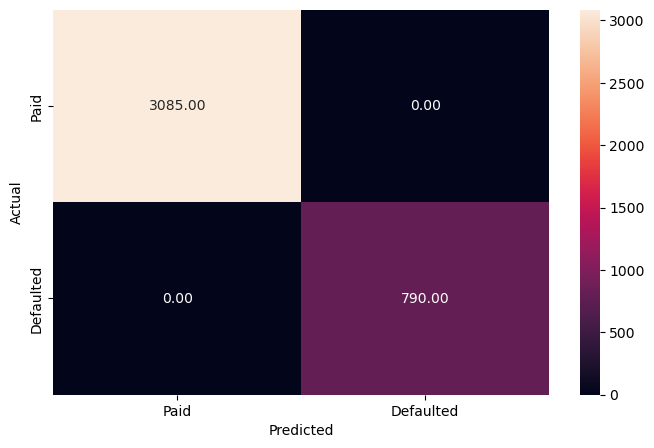

In [41]:
# Let's check the performance on the training dataset to see if there is overfitting
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observation**
- For the training datset: Precision, recall, and the F1-score for both classes (0 and 1) are 1. This means that the model is perfectly predicting the classes on the training data.

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1323
           1       0.66      0.58      0.62       338

    accuracy                           0.85      1661
   macro avg       0.78      0.75      0.76      1661
weighted avg       0.85      0.85      0.85      1661



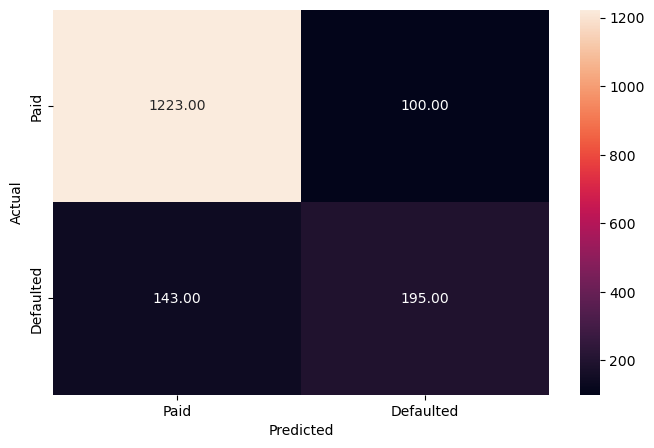

In [42]:
# Let's check the performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [61]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.778166,0.750669,0.853703


**Observation**
- For class 0, the precision, recall, and F1-score are all about 0.90. This suggests that when the model predicts class 0, it is correct 90% of the time (precision), and it correctly identifies 90% of all actual instances of class 0 (recall). The F1-score, which is the harmonic mean of precision and recall, is also 0.91.
- For class 1, these metrics are all approximately 0.60, which is lower than for class 0. This suggests that the model is not performing as well on instances of class 1 as it is on instances of class 0.
- The overall accuracy of the model on the test data is approximately 0.85, which means the model made correct predictions for about 85% of instances in the test data.
- This isn't too bad but suggest that the model might be overfitting to the training data.

<Axes: xlabel='Importance'>

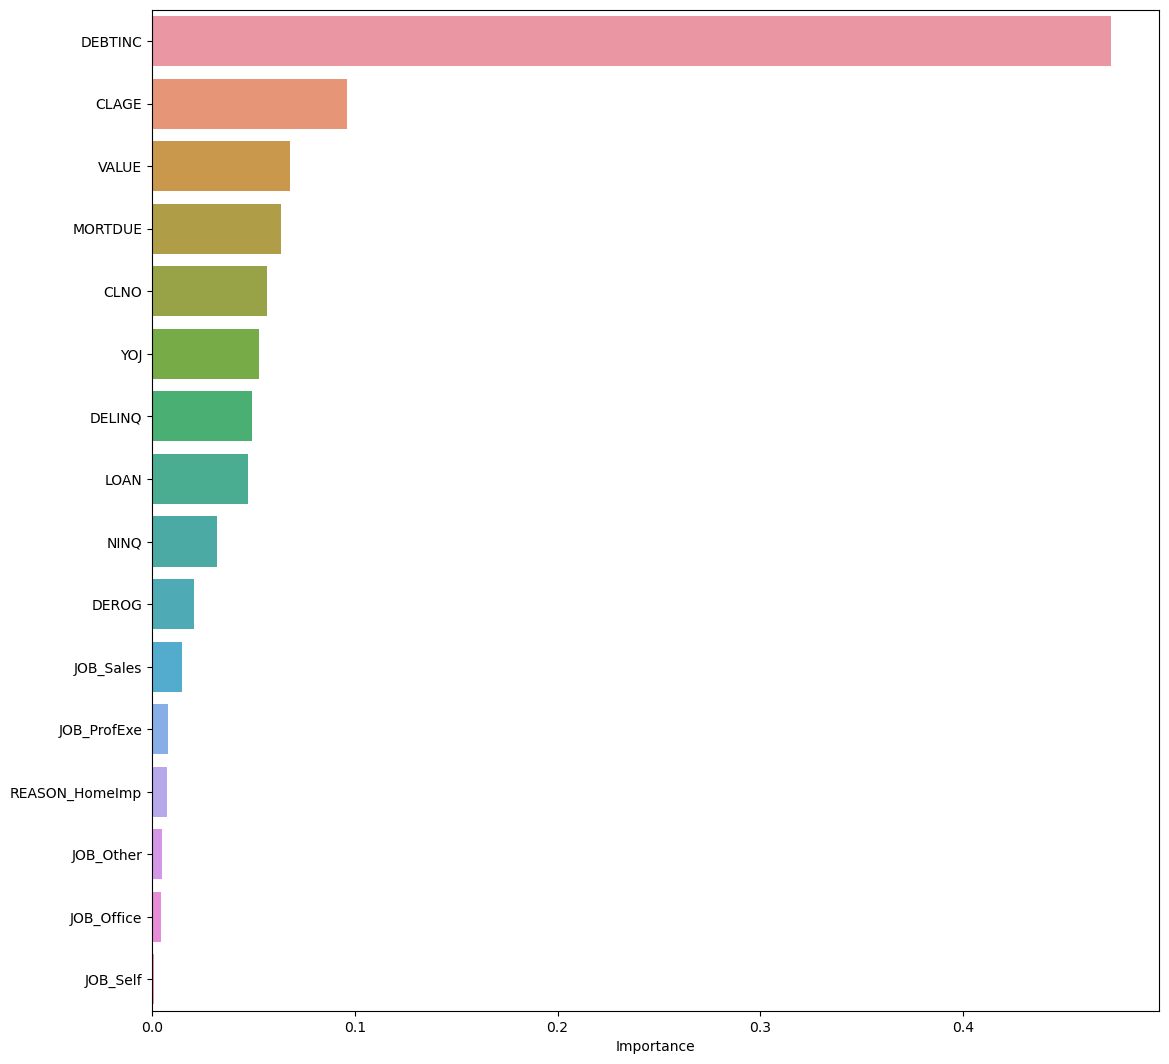

In [43]:
# Plot the feature importance and check for the most important features

importances = dt.feature_importances_
columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index)

**Observations**
- Unsurprisingly, DEBTINC (Debt-to-income ratio) is the most dominant attribute in predicting default or not followed by CLAGE (Age of the oldest credit line in months), VALUE (Current value of the property), and MORTDUE (Amount due on the existing mortgage.)
- Interestingly, factors I would have assumed would be important like DELINQ (aka Number of delinquent credit lines) does not seem to have a big impact on their likliehood of default


### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [44]:
# Let's use hyperparameter tuning to reduce overfitting of the model
# Choose the type of classifier 

d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=6,
                       min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3085
           1       0.73      0.77      0.75       790

    accuracy                           0.90      3875
   macro avg       0.84      0.85      0.84      3875
weighted avg       0.90      0.90      0.90      3875



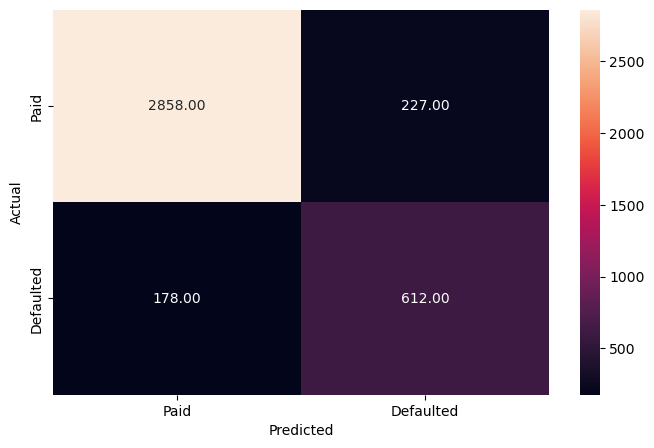

In [45]:
# Let's check the performance on the training dataset again to see if there is overfitting
y_train_pred_dt2 = d_tree_tuned.predict(x_train)

metrics_score(y_train, y_train_pred_dt2)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1323
           1       0.68      0.69      0.69       338

    accuracy                           0.87      1661
   macro avg       0.80      0.80      0.80      1661
weighted avg       0.87      0.87      0.87      1661



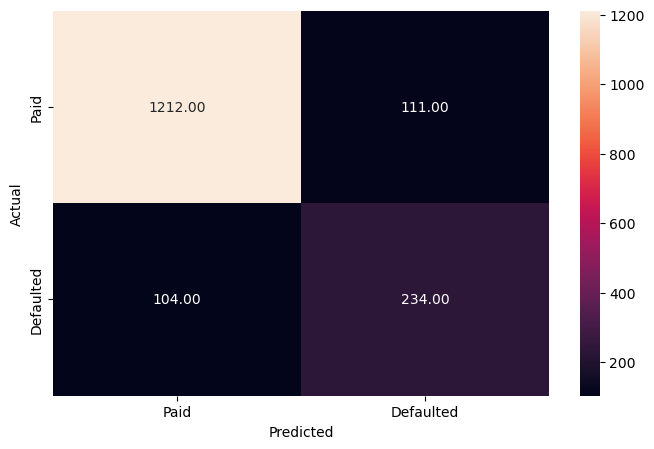

In [46]:
# Let's check the performance on the test dataset again to see if there is overfitting
y_test_pred_dt2 = d_tree_tuned.predict(x_test)

metrics_score(y_test, y_test_pred_dt2)

In [47]:
dtree_tuned_test = model_performance_classification(d_tree_tuned,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.799617,0.804204,0.87056


**Observations**
- It looks like we've reduced overfitting significantly. Before tuning, the difference was 15 percentage points (100% - 85%), and now it's only 3 percentage points (90% - 87%).
- Testing performance has also improved slightly -- from 85% to 87%
- Overall performance is down a bit from 100% to 90% which isn't terrible. This could just be suggesting that the orginal model was simply "memorizing" the data and not able to gerneralize from it

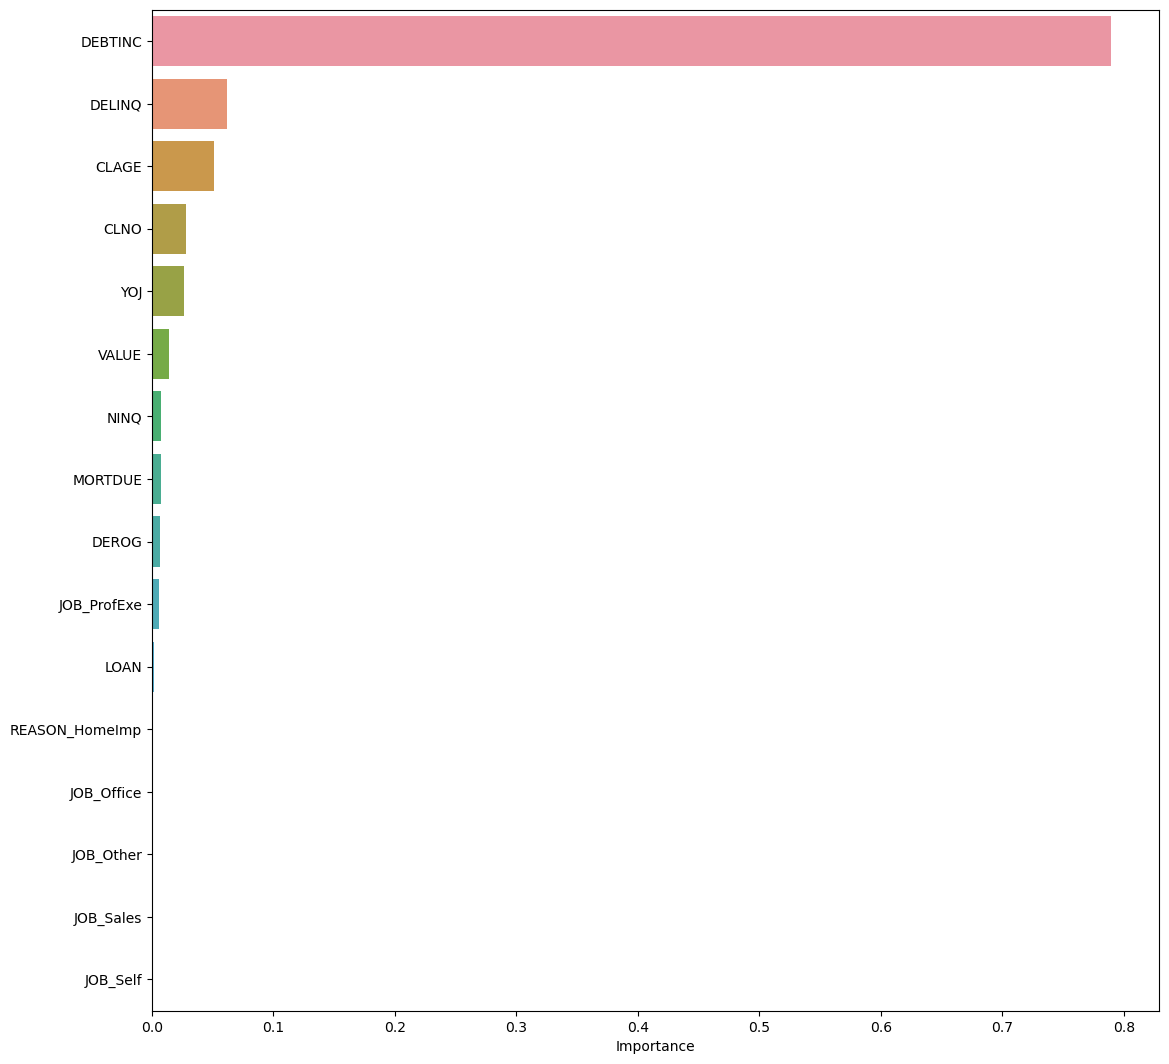

In [48]:
# look at the feature importance of this model again to see what is happening

importances = d_tree_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index);

**Observations**

- After tuning the model, it seems even more clear that DEBTINC is the most significant predictor in terms of liklihood of default
- The only other major change is that DELINQ moved up to be the 2nd most important attribute predicting default which makes lot's of intutitive sense

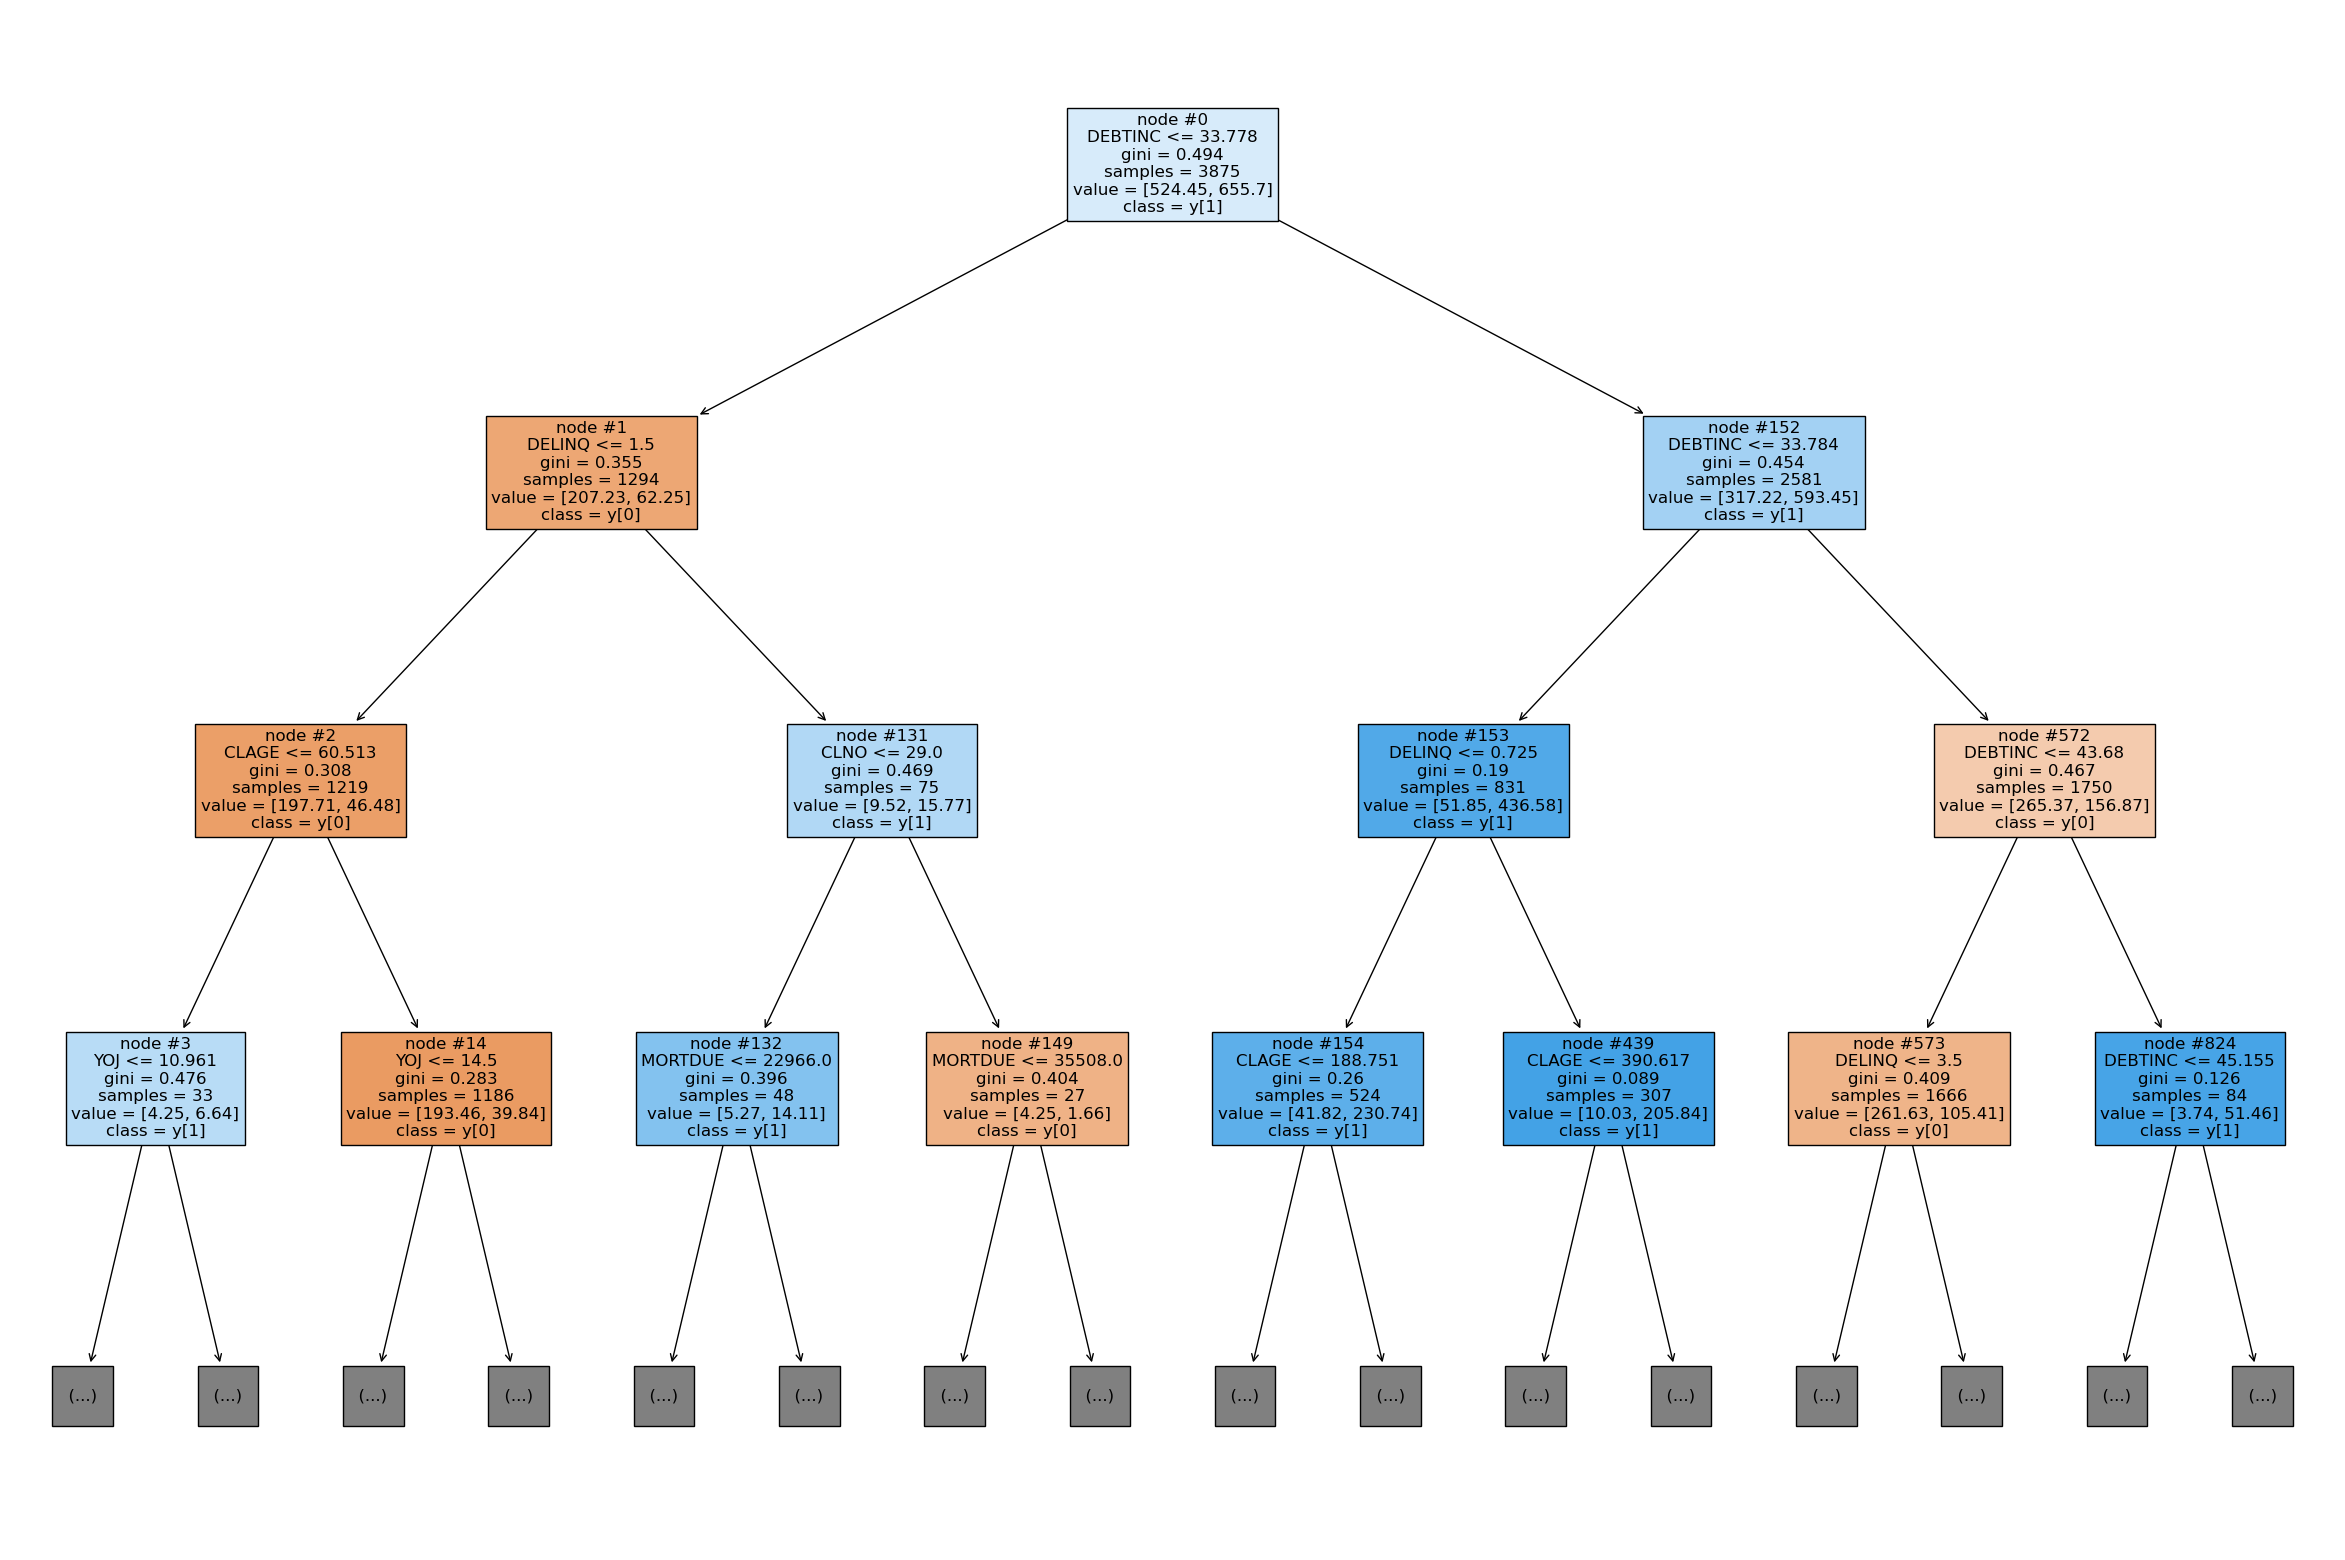

In [49]:
#let's plot the tree and see what is going on

features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 3, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

*Note: Blue leaves represent a loan default (1), orange leaves represent a loan payment (0). The more the number of observations in a leaf, the darker its color gets.*

**Observations:**
- We can see that the first split is based on DEBTINC. If Debt-to-income ratio is greater than 33.778 it is likely they'll default (probability of a missclasification here is still high gini = .494)
- To be honest, I'm struggling with how to interpret the decision tree beyond this

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [50]:
# Let's fit the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3085
           1       1.00      1.00      1.00       790

    accuracy                           1.00      3875
   macro avg       1.00      1.00      1.00      3875
weighted avg       1.00      1.00      1.00      3875



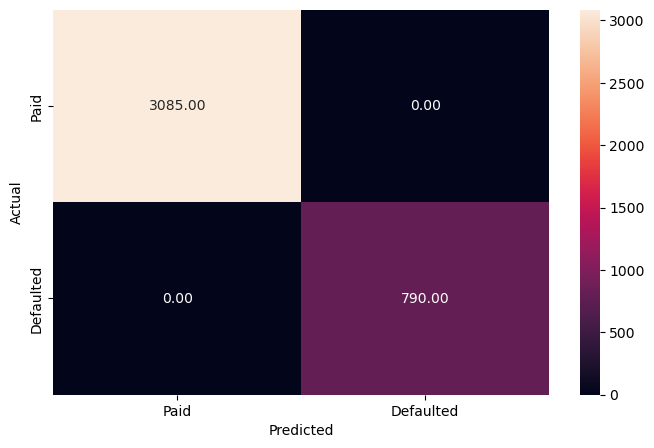

In [51]:
# Let's check performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

**Observation**
- The Random Forest is giving a 100% score for all metrics on the training dataset.

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1323
           1       0.88      0.66      0.75       338

    accuracy                           0.91      1661
   macro avg       0.90      0.82      0.85      1661
weighted avg       0.91      0.91      0.91      1661



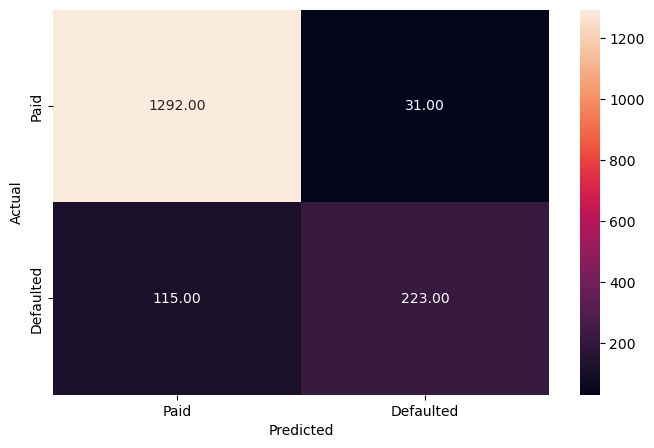

In [52]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [53]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.898109,0.818166,0.912101


**Observations:**
- There is some overfitting happening; the metrics on the training data are all perfect (1.00), but the metrics on the test data are a bit lower (accuracy = 0.91)
- Also, recall on 1 (aka default) is low (0.66) which is very important given we want to minimize the number of "false negatives" meaning the number of loans we assume will be paid which will actually end up defaulting.

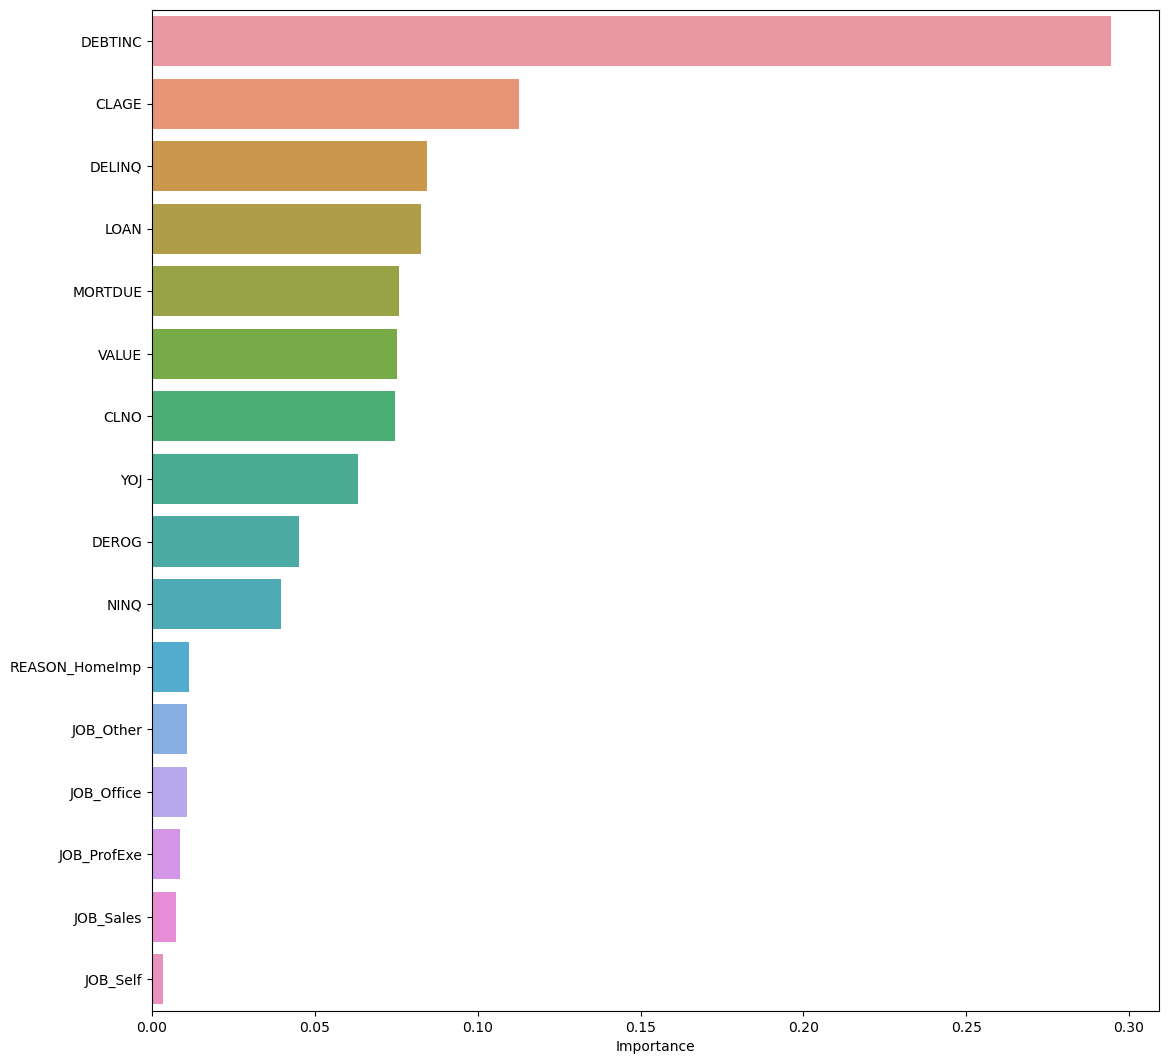

In [54]:
# let's check the feature importance of the random forest

importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index);

**Observation**
- Again verifies that DEBTINC, CLAGE, DELINQ, LOAN, etc. are the most important features indicating a default

### **Random Forest Classifier Hyperparameter Tuning**

In [55]:
# Let's tune our random forest classifier

# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [56]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, max_features='auto',
                       min_samples_leaf=3, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3085
           1       0.90      1.00      0.95       790

    accuracy                           0.98      3875
   macro avg       0.95      0.98      0.97      3875
weighted avg       0.98      0.98      0.98      3875



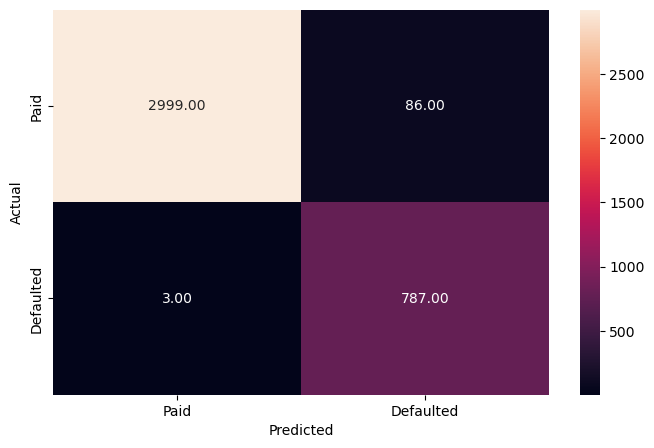

In [57]:
# Let's check performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1323
           1       0.81      0.78      0.80       338

    accuracy                           0.92      1661
   macro avg       0.88      0.87      0.87      1661
weighted avg       0.92      0.92      0.92      1661



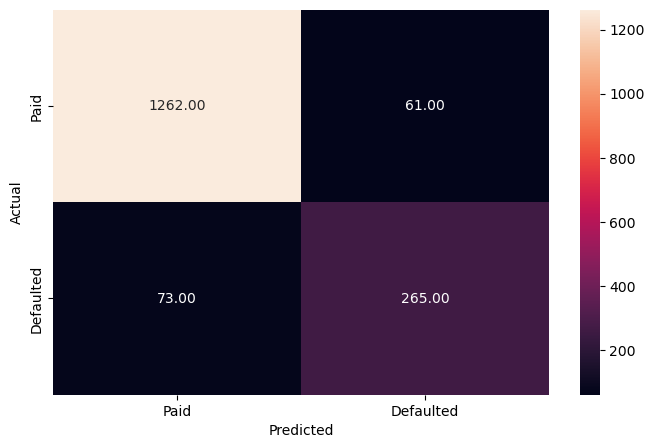

In [58]:
# Let's check performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

**Observation**
- The tuned model seems to be overfitting slightly less with still good accuracy
- Also, we bumped up our Recall for default (1) on the test data from 0.66 to 0.78 which is great since this is what we're trying to optmize for!


In [62]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.879101,0.868958,0.919326


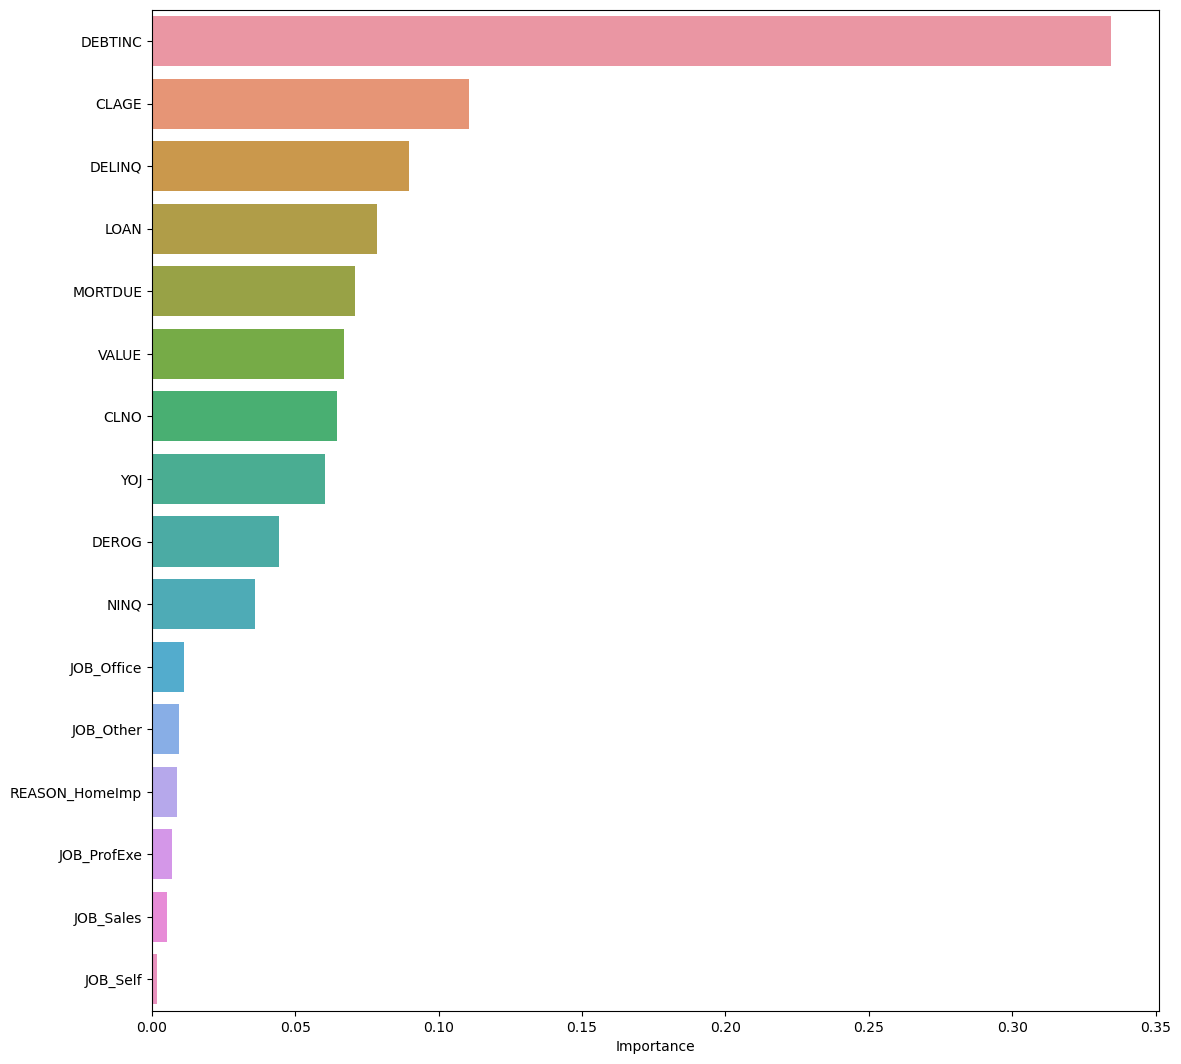

In [59]:
# Again, let's plot feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index);

**Observation**
- Looks mostly the same again which is good!

## Comparison of the models we've built

In [65]:
# Comparison of the models we've built


models_test_comp_df = pd.concat(

    [
    dtree_test.T, dtree_tuned_test.T,rf_estimator_test.T,
    rf_estimator_tuned_test.T
    ],

    axis = 1,
)

models_test_comp_df.columns = [
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier",
]

In [64]:
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier
Precision,0.778166,0.799617,0.898109,0.879101
Recall,0.750669,0.804204,0.818166,0.868958
Accuracy,0.853703,0.870560,0.912101,0.919326


## Notes

**What is a Random Forest?**

Random Forest is another ensemble learning technique that combines multiple Decision Trees to create a more robust and accurate model. Like Bagging, it involves training multiple models on different subsets of the training data, but with an additional twist: at each split in the tree, only a random subset of the available features is considered for splitting.

This helps to reduce the correlation between the trees in the forest and improves their overall accuracy.

**How does a Random Forest work?**

A Random Forest works by training multiple Decision Trees on different subsets of the training data, and then combining their predictions by taking their average. The key difference from Bagging is that at each split in the tree, only a random subset of the features is considered for splitting.

The algorithm works as follows:

1. Generate multiple random subsets of the training data (with replacement).
2. For each subset, train a Decision Tree on a random subset of the features.
3. Make predictions for new data by averaging the predictions of all the trees in the forest.

The number of trees in the forest and the number of features considered at each split are hyperparameters that can be tuned to optimize the performance of the model.

The Random Forest algorithm doesn't have any specific equations, but it involves training multiple Decision Trees on different subsets of the training data with a random subset of the features considered at each split.